# Fashion MNIST with Keras

In [4]:
import random

import keras
from keras import Sequential, layers
from matplotlib import pyplot as plt
import numpy as np

/Users/terasakisatoshi/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Loading Fashion MNIST

In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,
                               test_labels) = fashion_mnist.load_data()
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
    'Sneaker', 'Bag', 'Ankle boot'
]

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_labels.shape

(60000,)

# Visualize Data

In [5]:
num_data = train_images.shape[0]
sample_idx = random.sample(list(range(num_data)), 36)
sample_data = train_images[sample_idx]

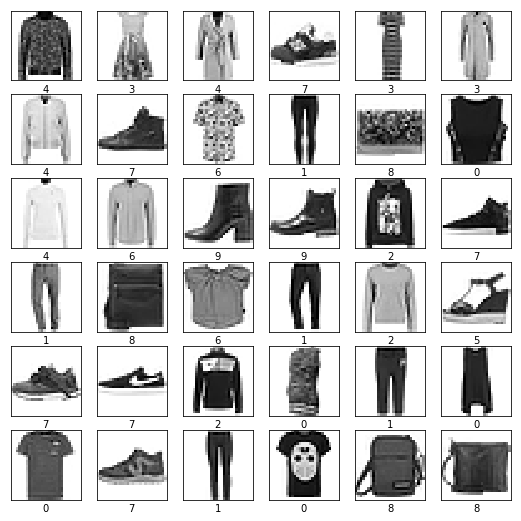

In [6]:
from itertools import product
fix, axis = plt.subplots(6, 6, figsize=(9, 9))
for i, (row, col) in enumerate(product(range(6), repeat=2)):
    axis[row, col].imshow(sample_data[i], cmap=plt.cm.binary)
    axis[row, col].tick_params(labelbottom=False, bottom=False)
    axis[row, col].tick_params(labelleft=False, left=False)
    axis[row, col].set_xlabel(train_labels[sample_idx[i]])

# Start to train

In [7]:
train_images = train_images / 255.0

In [8]:
from keras.optimizers import Adam
model = Sequential([layers.Flatten(input_shape=(28, 28)),
                    layers.Dense(100, activation='relu'),
                    layers.Dense(100, activation='relu'),
                    layers.Dense(10, activation='softmax')])
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs=10, batch_size=32)

Epoch 1/8
60000/60000 [==============================] - 9s 144us/step - loss: 0.4889 - acc: 0.8264
Epoch 2/8
60000/60000 [==============================] - 9s 146us/step - loss: 0.3670 - acc: 0.8662
Epoch 3/8
60000/60000 [==============================] - 10s 167us/step - loss: 0.3345 - acc: 0.8767
Epoch 4/8
60000/60000 [==============================] - 10s 162us/step - loss: 0.3120 - acc: 0.8851
Epoch 5/8
60000/60000 [==============================] - 10s 167us/step - loss: 0.2920 - acc: 0.8910
Epoch 6/8
60000/60000 [==============================] - 11s 184us/step - loss: 0.2796 - acc: 0.8967
Epoch 7/8
60000/60000 [==============================] - 11s 191us/step - loss: 0.2673 - acc: 0.9002
Epoch 8/8
60000/60000 [==============================] - 9s 145us/step - loss: 0.2567 - acc: 0.9031


In [10]:
arr = np.array([[1, 0, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0]])
np.argmax(arr, axis=1)

array([0, 0, 1, 2])

In [11]:
test_images = test_images / 255.0

In [12]:
num_data = test_images.shape[0]
sample_idx = random.sample(list(range(num_data)), 36)
sample_images = test_images[sample_idx]
output = model.predict(sample_images)
predictions = np.argmax(output, axis=1)

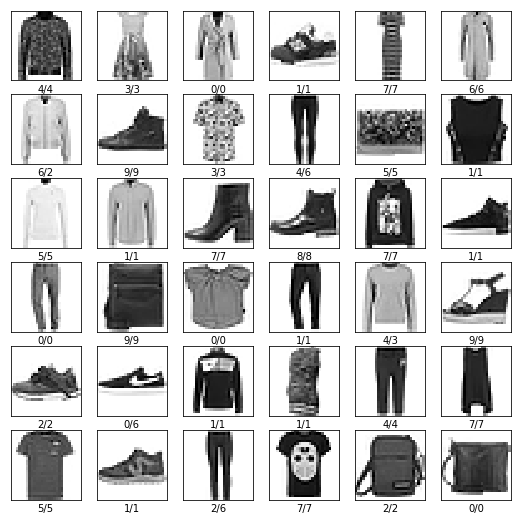

In [13]:
fix, axis = plt.subplots(6, 6, figsize=(9, 9))
for i, (row, col) in enumerate(product(range(6), repeat=2)):
    axis[row, col].imshow(sample_data[i], cmap=plt.cm.binary)
    axis[row, col].tick_params(labelbottom=False, bottom=False)
    axis[row, col].tick_params(labelleft=False, left=False)
    axis[row, col].set_xlabel("{}/{}".format(test_labels[sample_idx[i]],
                                             predictions[i]))

In [14]:
output = model.predict(test_images)
predictions = np.argmax(output, axis=1)
sum(predictions == test_labels) / len(test_labels)

0.8758